# Kryptografia klasyczna (od starożytności do czasów współczesnych)
### Literatura:
1. Księga szyfrów, Simon Singh, Świat książki, 2001
2. Łamacze kodów, David Kahn, WNT, 2004

### Szyfr Cezara
--------------
Szyfr Cezara oczywiście nie zawdzięcza swego istnienia Juliuszowi Cezarowi. Został przezeń jedynie wspomniany w pamiętnikach o wojnach galijskich. Prawdopodobnie była to dobrze znana metoda w tym czasie.

In [1]:
# Alfabet jawny i szyfrowy 
alphabet = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

alphabet_size = 26

plaintext = "Zorro fly zealotry zipper"

ciphertext = ""

key = 15 #przesunięcie permutacji czyli klucz szyfrowania 

print("Tekst jawny: ", plaintext)

for text in plaintext.lower().split():
    for char in text:
        ciphertext = ciphertext + alphabet[(alphabet.index(char) + key) % alphabet_size] 
print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

decodedtext = ""
for text in ciphertext:
    for char in text:
        decodedtext = decodedtext + alphabet[(alphabet.index(char)- key) % alphabet_size]
print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")

Tekst jawny:  Zorro fly zealotry zipper
Szyfrogram:  odggduanotpadignoxeetg (spacje usunięte)
Odszyfrowana wiadomość:  zorroflyzealotryzipper (spacje usunięte)


## Szyfr monoalfabetyczny: 
_danemu symbolowi alfabetu jawnego odpowiada dokładnie jeden i ten sam symbol alfabetu tajnego._

### Zastanów się:
1. Czy szyfr Cezara jest łatwy do złamania? Ile prób (testów przesunięć) trzeba aby złamać szyfr Cezara?
2. Co to jest atak siłowy (__brute force__)?  
3. Zaproponuj i zaimplementuj wariant szyfru Cezara, która wymaga wykonania większej liczby prób podczas ataku?  
4. Oceń koszt ataku na ten wariant Cezara.

### Zadanie samodzielne dla studentów
1. Napisz ,,ulepszony szyfr Cezara'' czyli monoalfabetyczny szyfr z tajną pemutacją alfabetu szufrowego
2. Można wykorzystać funkcję random.permutation() z biblioteki numpy

In [14]:
# lepszy Cezar
import numpy as np
plaintext = "Zorro fly zealotry zipper"
joined_text = ""
key = 15
alphabet_size = 26

for word in plaintext.lower().split():
  for char in word:
    joined_text += char

char_list = [el for el in joined_text]
# print(char_list)

random_alphabet = list(np.random.permutation(alphabet))
# print(random_alphabet)

result_text = ""

for char in char_list:
  result_text = result_text + random_alphabet[(random_alphabet.index(char) + key) % alphabet_size] 
print("Szyfrogram: ",  result_text, "(spacje usunięte)")


Szyfrogram:  uvkkvpbrulfbvmkrujqqlk (spacje usunięte)


## Kryptoanaliza szyfrów monoalfabetycznych

Współcześnie kryptoanaliza szyfru Cezara jest trywialna. Można po prostu sprawdzić wszystkie 26 możliwych przesunięć. 

Szyfry monoalfabetyczne nie są także odporne na __kryptoanalizę statystyczną__. Znając rozkład częstości liter w tekstach napisanych w danym języku możemy odgadnąć przesunięcie obserwując minima i maxima w histogramach. 

W zasadzie kluczową sprawą w obu przypadkach jest znajomość języka, a w gruncie rzeczy alfabetu. 

### Zadanie samodzielne dla studentów
1. Narysuj rozkład częstości występowania liter w języku angielskim (kod rysowania histogramu poniżej)

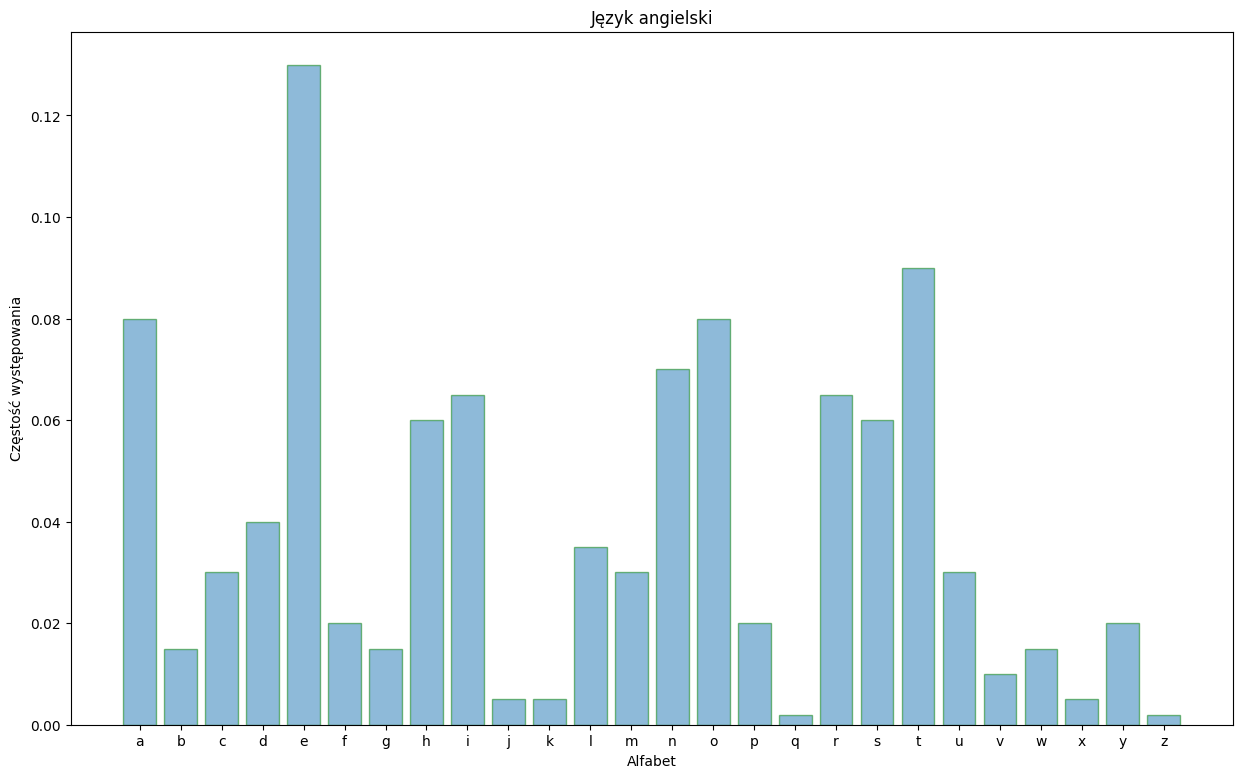

In [15]:
from matplotlib import pyplot as plt
import numpy as np

frequency = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 0.030, 0.010, 0.015, 0.005, 0.020, 0.002]
labels = np.arange(26)
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), alphabet)
plt.title("Język angielski");
plt.ylabel('Częstość występowania')
plt.show()

2. Dokonaj analizy częstości występowania liter w tekście jawnym i szyfrogramie (szyfr Cezara z dowolnym przesunięciem) dla tekstu w poniższym fragmencie kodu. Wyświetl wyniki podobnie jak powyżej. 
3. Dokonaj analizy częstości występowania liter w szyfrogramie wygenerowanym przez "ulepszonego Cezara"

[('u', 19), ('t', 18), ('f', 17), ('l', 13), ('a', 12), ('j', 11), ('r', 11), ('b', 8), ('e', 7), ('d', 6), ('k', 5), ('c', 5), ('z', 4), ('q', 4), ('o', 3), ('v', 3), ('s', 2), ('n', 2), ('i', 1), ('x', 1), ('p', 1)]
[19, 18, 17, 13, 12, 11, 11, 8, 7, 6, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1, 1]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (153,) and arg 1 with shape (21,).

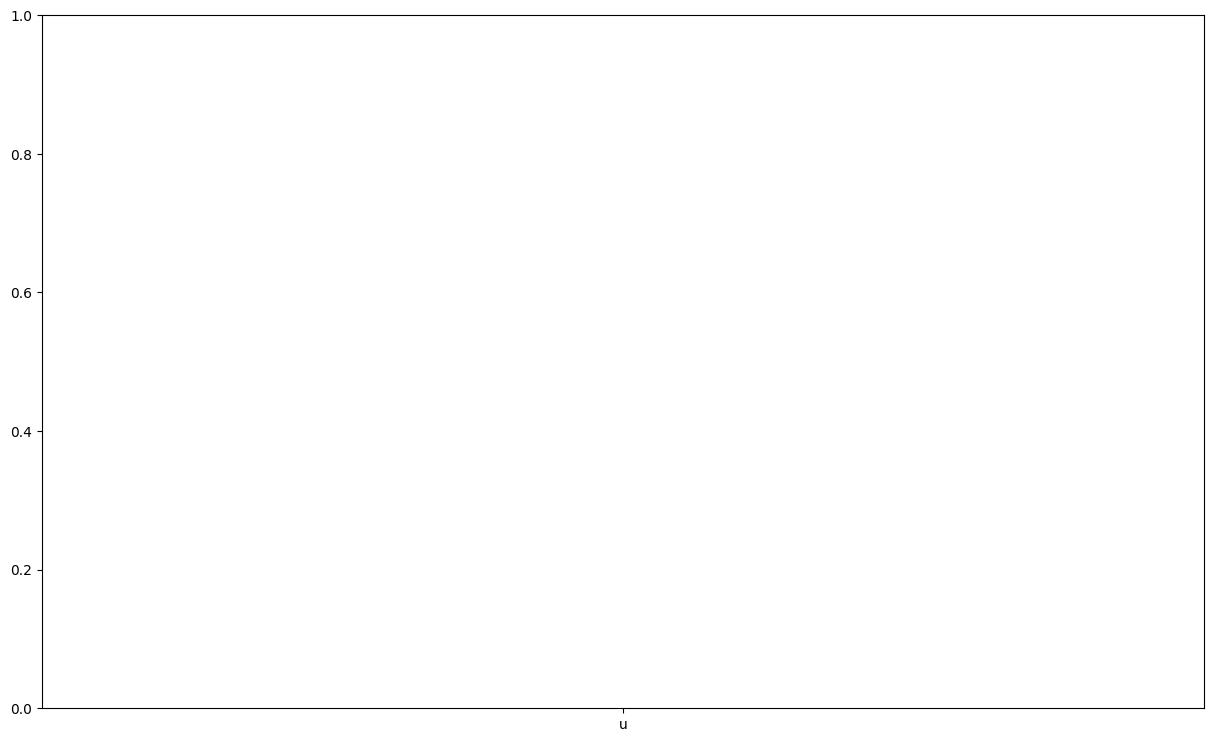

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter as ctr

plaintext = "tobeornottobethatisthequestionwhethertisnoblerinthemindtosuffertheslingsandarrowsofoutrageousfortuneortotakearmsagainstaseaoftroublesandbyopposingendthem"
alphabet = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#ulepszony cyfr cezara ponizej:
joined_text = ""

for word in plaintext.lower().split():
  for char in word:
    joined_text += char

char_list = [el for el in joined_text]
# print(char_list)

random_alphabet = list(np.random.permutation(alphabet))
# print(random_alphabet)

result_text = ""

for char in char_list:
  result_text = result_text + random_alphabet[(random_alphabet.index(char) + key) % alphabet_size] 

# czestosc i rozklad:
char_counted = ctr(result_text).most_common()
print(char_counted)

# policz częstość i wyświetl rozkłady 
frequency = [char[1] for char in char_counted ]
print(frequency)
labels = [char for char in result_text]
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(labels, alphabet)
plt.title("Język angielski");
plt.ylabel('Częstość występowania')
plt.show()

## Podsumowanie 
Główną słabością szyfrów monoalfabetycznych jest stałość przekształcenia, dzięki czemu możliwe jest łatwe zaobserwowanie regularności.

Rozwiązaniem może być zmiana alfabetów w trakcie szyfrowania. Dla uproszczenia wystarczy zmieniać jedynie porządek liter w alfabetach szyfrowych. 

### Zadanie samodzielne dla studentów
1. Napisać program, który zmienia alfabet szyfrowania po każdej literze.
_Co będzie potrzebne oprócz tekst jawnego?_
2. Dokonaj analizy częstościowej szyfrogramu zaszyfrowanego szyfrem Vigenera


In [17]:
from string import ascii_lowercase as alphabet
from collections import Counter as ctr

alphabet = list(alphabet)
alphabet_size = len(alphabet)

plaintext = "tobeornottobethatisthequestionwhethertisnoblerinthemindtosuffertheslingsandarrowsofoutrageousfortuneortotakearmsagainstaseaoftroublesandbyopposingendthem"
key = "klucz"
ciphertext = ""

key_length = len(key)

for i in range(len(plaintext)):
  tmp_key_index = alphabet.index(key[i % key_length])
  ciphertext += alphabet[(alphabet.index(plaintext[i]) + tmp_key_index) % alphabet_size]

print("zaszyfrowana wiadomosc:", ciphertext)
print("Rozkład: ", ctr(ciphertext).most_common())


zaszyfrowana wiadomosc: dzvgnbyivsymyvgkecusrpkwdcecqmgsyvgocnkrxzvndbthvgoxcpcdzmwepplvgodfkmqdupckclqvczzqtdcuidyfmhnbeopdycnqskvycqwduizsymvzcpuqedciwavpmcmnmsqozzmkmqphfsrpg
Rozkład:  [('c', 15), ('d', 11), ('v', 11), ('m', 11), ('p', 10), ('z', 9), ('q', 9), ('y', 8), ('g', 7), ('s', 7), ('k', 7), ('n', 6), ('e', 5), ('u', 5), ('o', 5), ('i', 4), ('w', 4), ('b', 3), ('r', 3), ('h', 3), ('f', 3), ('x', 2), ('t', 2), ('l', 2), ('a', 1)]


### Zastanów się:
1. Sprawdź jak wygląda histogram szyfrogrami. 
2. Zastanów się jakie znaczenia ma długość klucza dla bezpieczeństwa szyfrowania.
3. Czy powtarzanie klucza można wykorzystać dla potrzeb kryptoanalizy? 
4. Jaki klucz gwarantowałby bezpieczeństwo?
5. Jaki rozkład częstości symboli szyfrogramu nie ujawni żadnych przydatnych danych kryptoanalitykowi? 

## Szyfr polialfabetyczny 
_Szyfr używający wielu alfabetów szyfrowych. W trakcie szyfrowania te same litery w tekście jawnym_

## Szyfr doskonały (według Clouda Shannona):
1. Jakie warunki musi spełniać szyfr-nie-do-złamania? 